In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns

sns.set()

# Create Decision Tree

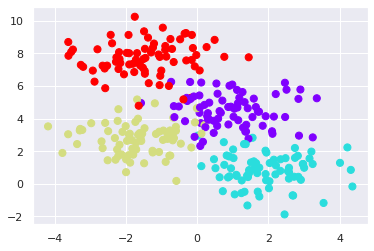

In [63]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1)

graph.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='rainbow')
graph.show()

In [64]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(x, y)

In [82]:
def visualize_classifier(model, x, y, ax=None, cmap='rainbow'):
    ax = ax or graph.gca()
    
    ax.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Fit estimator
    model.fit(x, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # create color plot with results
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


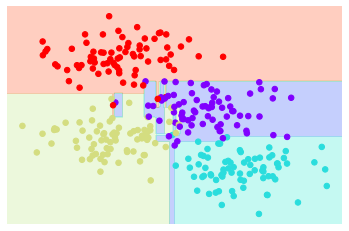

In [84]:
visualize_classifier(DecisionTreeClassifier(), x, y)

# Ensemble of estimators: Random forests

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


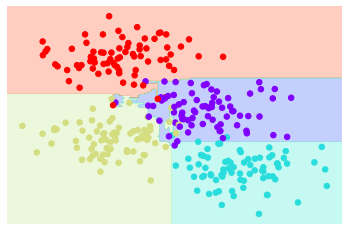

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(x, y)
visualize_classifier(bag, x, y)

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


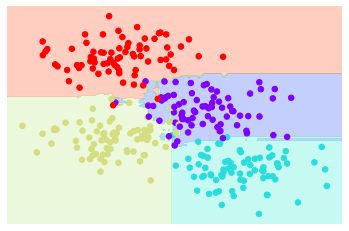

In [87]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x, y)
visualize_classifier(forest, x, y)

# Random Forest Regression

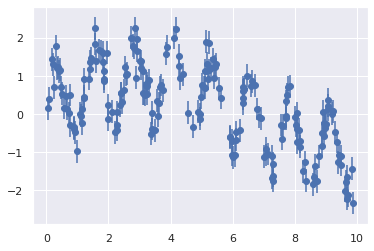

In [89]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

y = model(x)
graph.errorbar(x, y, 0.3, fmt='o')
graph.show()

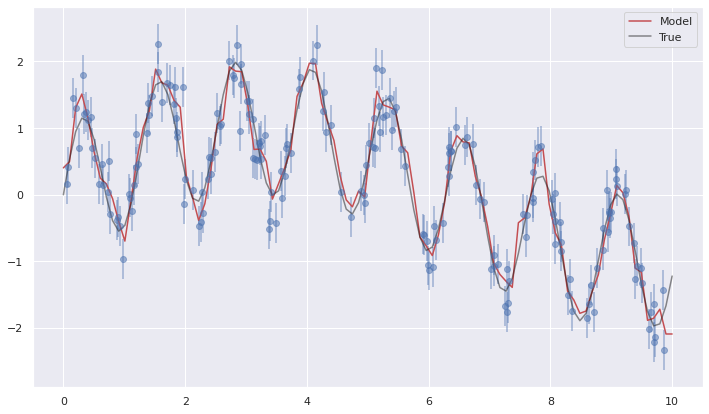

In [92]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 100)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

graph.figure(figsize=(12, 7))
graph.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
graph.plot(xfit, yfit, '-r', label='Model')
graph.plot(xfit, ytrue, '-k', alpha=0.5, label='True')
graph.legend()
graph.show()

# Random FOrest for classifying digits

In [94]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

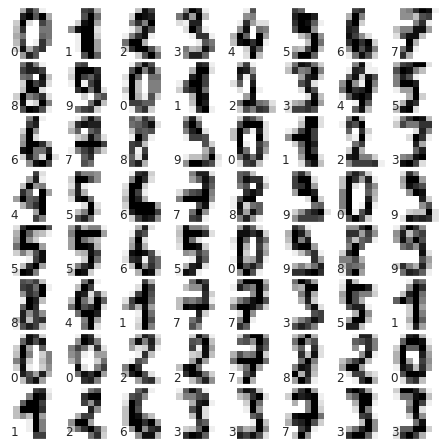

In [97]:
# set up the figure
fig = graph.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=graph.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [99]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [100]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.98      1.00      0.99        43
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.96      0.98      0.97        46

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



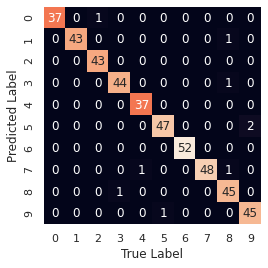

In [102]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
graph.xlabel('True Label')
graph.ylabel('Predicted Label')
graph.show()